# Introdução

O Database Iris é o database mais empregado em livros, cursos, vídeos, notebooks no Kaggle e até mesmo em documentação de machine learning.
Usado principalmente para algoritmos de machine learning de classificação supervisionado, ele também é usado para algoritmos não supervisionados (clusterização) e até mesmo em redes neurais.

O presente notebook apresenta uma resolução de classificação para esse conjunto de dados com:
*   Breve análise exploratória dos dados, 
*   Escolha de modelo mais adequado
*   Otimização de hiperparâmetros
*   Análise dos resultados do modelo escolhido.


# Importação de bibliotecas e dados

In [ ]:
#importando bibliotecas
  
  # Importação e manipulação de dados
from sklearn import datasets
import pandas as pd
import numpy as np

  # Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

  # Modelagem
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
 
  # Otimização
from sklearn.model_selection import GridSearchCV

  # Resultados
from sklearn import metrics
from sklearn.metrics import accuracy_score
  

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#versões
import sys
print('Versão do Python:', sys.version)
print('Versão do numpy: %s' % np.__version__)
print('Versão do pandas: %s' % pd.__version__)
print('Versão do seaborn: %s' % sns.__version__)


Versão do Python: 3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0]
Versão do numpy: 1.18.5
Versão do pandas: 1.0.5
Versão do seaborn: 0.10.1


In [ ]:
#importando dados do dataset

# Através da leitura da documentação presente em https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html 
# obtem-se os dados através de acesso dos métodos data, target, feature_names, target_names de um objeto bunch.

iris = datasets.load_iris()

iris_X = iris.data
iris_Y = iris.target
iris_feats = iris.feature_names + ['species'] # não continha nome da variavel alvo
iris_species = iris.target_names

# Criação do dataframe iris_df
iris_df = pd.DataFrame(data= np.c_[iris_X, iris_Y], columns=iris_feats)

In [ ]:
# Coluna targets tem valores númericos. Trocando por nomes
iris_df.species = iris_df.species.map(dict(zip([0,1,2], iris.target_names)))

# Colunas com nome em inglês. Trocando para nomes em português
cols_pt = ['sepala_comp', 'sepala_larg','petala_comp', 'petala_larg', 'especie']
iris_df.columns = cols_pt

In [ ]:
# Dataframe pronto
iris_df

,sepala_comp,sepala_larg,petala_comp,petala_larg,especie
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Análise exploratória

In [ ]:
#Formato das variáveis.
print(iris_df.shape[0], 'registers with ', iris_df.shape[1],' variables' '\n')
print(iris_df.info(memory_usage=False), '\n')
print(iris_df.describe(), '\n')
print('Unique values in target: ', iris_df.especie.unique())
print(iris_df.especie.value_counts())

150 registers with  5  variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepala_comp  150 non-null    float64
 1   sepala_larg  150 non-null    float64
 2   petala_comp  150 non-null    float64
 3   petala_larg  150 non-null    float64
 4   especie      150 non-null    object 
dtypes: float64(4), object(1)None 

       sepala_comp  sepala_larg  petala_comp  petala_larg
count   150.000000   150.000000   150.000000   150.000000
mean      5.843333     3.057333     3.758000     1.199333
std       0.828066     0.435866     1.765298     0.762238
min       4.300000     2.000000     1.000000     0.100000
25%       5.100000     2.800000     1.600000     0.300000
50%       5.800000     3.000000     4.350000     1.300000
75%       6.400000     3.300000     5.100000     1.800000
max       7.900000     4.400000     6.900000     2.500000 

Unique v

Observa-se que, no conjunto de dados, temos 150 registros com 4 variáveis independentes e uma dependente.





1.   Das independentes, tem-se 4 variáveis quantitativas continuas (comprimento (cm) e largura (cm) tanto de sepala quanto de petala).
2.   A variável dependente do tipo Qualitativa nominal (Categórica). Separado em três categorias (setosa, versicolor , virginica), cada uma com 50 registros.

Observa-se também que não temos valores nulos para nenhum registro e, para todas as variáveis explicativas temos valores válidos, uma vez que, comprimento e largura devem ter valores reais positivos.




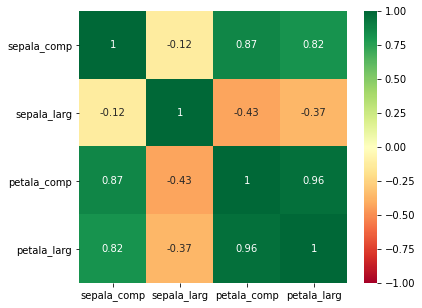

In [ ]:
#Análise de correlação
sns.heatmap(iris_df.corr(),annot=True, cmap='RdYlGn', vmin=-1, vmax=1)
fig=plt.gcf()
fig.set_size_inches(6,5)
plt.show()

Observa-se uma correlação entre a largura da pétala e se comprimento. Desta forma, descarta-se uma dessas variáveis para melhor performance dos modelos.

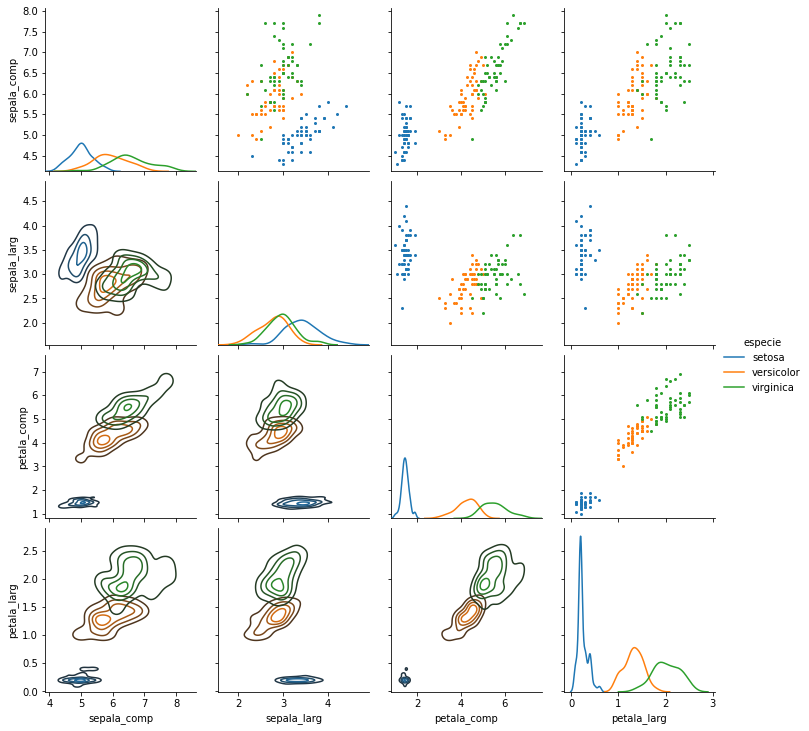

In [ ]:
g = sns.PairGrid(iris_df[['sepala_comp', 'sepala_larg','petala_comp','petala_larg','especie']], hue='especie')
g = g.map_upper(plt.scatter, s=4)
g = g.map_diag(sns.kdeplot) 
g = g.map_lower(sns.kdeplot, n_levels=4)
g = g.add_legend()

Pelo pairgrid apresentado, observa-se:

1.   Os valores das três variáveis explicativas apresentam um comportamento de distribuição gaussiano
2.   A espécie setosa apresenta valores de comprimento de pétala pequenos, separado dos pontos das duas outras espécies. Sugerindo uma classificação fácil pelo algoritmo.
3.   Uma possível separação entre as classes versicolor e virgica através de modelos classificatórios, visto que suas distribuições se sobrepôem poucamente (overlap) por comprimento de pétala.

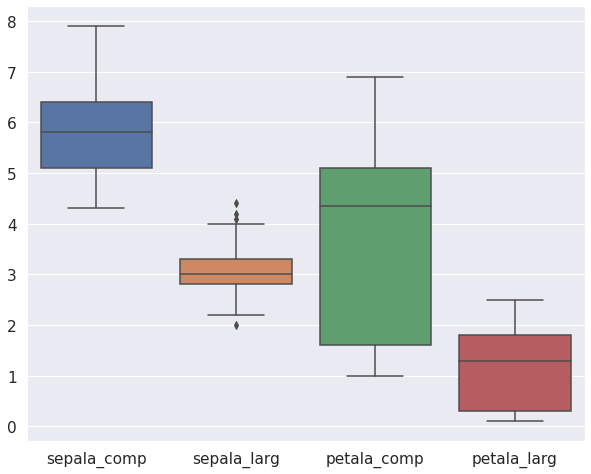

In [ ]:
sns.boxplot(data=iris_df[['sepala_comp', 'sepala_larg','petala_comp','petala_larg']])
fig=plt.gcf()
fig.set_size_inches(10,8)


Por fim, pelo boxplot, obseva-se nenhum outlier para nenhuma das variáveis explicativas

#Escolha do modelo

Como a variável dependente é to tipo qualitativa nominal (i. e. categórica). Tem-se um problema de classificação e, como a variável é nomeada, deve-se empregar modelos supervisionados.

Uma vez que temos um conjunto de dados pequeno (150 registros) e poucas variáveis explicativas (features) é difícil saber a priori qual modelo é mais recomendado para classificação. [1]

Assim sendo, será feita uma análise prévia de perfomance de modelos conhecidos de classificação de várias classes diferentes:

1.   k-Nearest Neighbor (k-NN)
2.   Support Vector Machine (SVM)
3.   Decision Tree (DT)
4.   Multinomial Logistic Regression (MLogR)
5.   Naïve Bayes (NB)

Para comparação, será obtidas a acurácia do modelo com intervalo de confiança (95%) com validação cruzada do tipo Kfold, dado que a variável dependente está balanceada (50 registros para cada classe) utilizando 70% do conjunto de dados.


In [ ]:
# Inicialmente, separa-se o conjunto de dados em duas partes: 
# 80% destinados a treino, seleção de modelo e otimização do modelo (X_train e y_train),
# 20% para avaliação de performance do modelo escolhido (X_test, y_test).

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (iris_df[iris_df.columns[0:4]], iris_df[iris_df.columns[-1]], test_size=0.3, random_state=0, shuffle = True)


# Além disso, defini-se dois conjuntos de variáveis explicativas:
# X_all_feats_train sendo com todas as variavies dependentes 
# X_sel_feats_train retirando-se a variável de largura de petála

X_all_feats_train = X_train
X_sel_feats_train = X_train[X_train.columns[0:3]]

print('X_all_feats_train')
print(X_all_feats_train,'\n')
print('X_sel_feats_train')
print(X_sel_feats_train)


X_all_feats_train
     sepala_comp  sepala_larg  petala_comp  petala_larg
60           5.0          2.0          3.5          1.0
116          6.5          3.0          5.5          1.8
144          6.7          3.3          5.7          2.5
119          6.0          2.2          5.0          1.5
108          6.7          2.5          5.8          1.8
..           ...          ...          ...          ...
9            4.9          3.1          1.5          0.1
103          6.3          2.9          5.6          1.8
67           5.8          2.7          4.1          1.0
117          7.7          3.8          6.7          2.2
47           4.6          3.2          1.4          0.2

[105 rows x 4 columns] 

X_sel_feats_train
     sepala_comp  sepala_larg  petala_comp
60           5.0          2.0          3.5
116          6.5          3.0          5.5
144          6.7          3.3          5.7
119          6.0          2.2          5.0
108          6.7          2.5          5.8
..      

In [ ]:
#Importando Validação cruzada
cv = KFold(n_splits = 10, shuffle=True, random_state=seed)

# Função para imprimir resultados de cada modelo
def imprime_resultados(nome, hyper_param_value, results):
  media = results['test_score'].mean() * 100
  desvio_padrao = results['test_score'].std() *100
  inter_conf = [(media - 2 * desvio_padrao).round(2), (media + 2 * desvio_padrao).round(2)]
  results = nome, hyper_param_value, media.round(2), desvio_padrao.round(2), inter_conf
  return (results)

# Função modelos
def Models (X, y, seed):

  # Modelando dados com KNN com n=1 a 10
  def KNN_model (X, y, cv):
    score_results = []
    for n in range(1,10):
      model = KNeighborsClassifier(n_neighbors=n)
      results_model = cross_validate(model, X, y, cv = cv, return_train_score=False, scoring = 'accuracy')
      out = imprime_resultados(KNN_model.__name__, n, results_model)
      score_results.append(out)
    return (score_results)

  # Modelando dados com SVM com kernels 'linear', 'poly', 'rbf', 'sigmoid'
  def SVM_model (X, y, cv):   
    score_results = []
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    for kernel in kernels:
      model = svm.SVC(kernel = kernel)
      results_model = cross_validate(model, X, y, cv = cv, return_train_score=False, scoring = 'accuracy')
      out = imprime_resultados(SVM_model.__name__, kernel, results_model)
      score_results.append(out)
    return (score_results)

  # Modelando dados com DT (decision Trees) com profundidade (depth) de 1 a 10
  def DT_model (X, y, cv): 
    score_results = []
    for depth in range(1,10):
      model = tree.DecisionTreeClassifier(random_state = seed, max_depth=depth)
      results_model = cross_validate(model, X, y, cv = cv, return_train_score=False, scoring = 'accuracy')
      out = imprime_resultados(DT_model.__name__, depth, results_model)
      score_results.append(out)
    return (score_results)

  # Modelando dados com  LogR com solvers 'newton-cg', 'sag', 'saga', 'lbfgs'
  def MLogR_model (X, y, cv):
    X_scaled = preprocessing.scale(X) # Este modelo requer variaveis explicativas normalizadas
    score_results = []
    solvers = ['newton-cg', 'sag', 'saga', 'lbfgs'] #Segundo a documentação, somente podem ser usados estes solvers para problemas multinomiais.
    for solver in solvers:
      model =  LogisticRegression(solver = solver) 
      results_model = cross_validate(model, X_scaled, y, cv = cv, return_train_score=False, scoring = 'accuracy')
      out = imprime_resultados(MLogR_model.__name__, solver, results_model)
      score_results.append(out)
    return (score_results)

  # Naive bayes
  def NB_model (X, y, cv):
    score_results = []
    model =  GaussianNB()
    results_model = cross_validate(model, X, y, cv = cv, return_train_score=False, scoring = 'accuracy')
    out = imprime_resultados(NB_model.__name__, 0, results_model)
    score_results.append(out)
    return (score_results)

  # Dummy
  def Dummy_model (X, y, cv):
    score_results = []
    model = DummyClassifier(strategy='prior')
    results_model = cross_validate(model, X, y, cv = cv, return_train_score=False, scoring = 'accuracy')
    out = imprime_resultados(Dummy_model.__name__, 0, results_model)
    score_results.append(out)
    return (score_results)

  # Definindo dataframes de retorno
  KNN_df = pd.DataFrame (data=KNN_model (X, y, cv), columns=['modelo', 'n', 'media_score', 'desv_pad', 'inter_conf'])
  SVM_df = pd.DataFrame (data=SVM_model (X, y, cv), columns=['modelo', 'kernel', 'media_score', 'desv_pad', 'inter_conf'])
  DT_df = pd.DataFrame (data=DT_model (X, y, cv), columns=['modelo', 'depth', 'media_score', 'desv_pad', 'inter_conf'])
  MLogR_df = pd.DataFrame (data=MLogR_model (X, y, cv), columns=['modelo', 'solver', 'media_score', 'desv_pad', 'inter_conf'])
  NB_df = pd.DataFrame (data=NB_model (X, y, cv), columns=['modelo', '-', 'media_score', 'desv_pad', 'inter_conf'])
  NB_df.drop(['-'], axis=1, inplace = True)
  Dummy_df = pd.DataFrame (data=Dummy_model (X, y, cv), columns=['modelo', '-', 'media_score', 'desv_pad', 'inter_conf'])
  Dummy_df.drop(['-'], axis=1, inplace = True)

  return (KNN_df, SVM_df, DT_df, MLogR_df, NB_df, Dummy_df)

In [ ]:
# aplicando modelos sobre os dados e obtendo scores de validação cruzada
A = Models(X_all_feats_train, y_train, 0)
B = Models(X_sel_feats_train, y_train, 0)

line = '==================================================='
print('Todas as features')
for i in A:
  print(' ',line, '\n', i,'\n', line, '\n')

print('sem a feature largura de pétala')
for i in B:
  print(' ',line, '\n', i,'\n', line, '\n')  



Todas as features
       modelo  n  media_score  desv_pad       inter_conf
0  KNN_model  1        94.27      7.65  [78.97, 109.57]
1  KNN_model  2        94.27      7.65  [78.97, 109.57]
2  KNN_model  3        95.18      4.83  [85.52, 104.84]
3  KNN_model  4        94.18      7.69  [78.79, 109.57]
4  KNN_model  5        94.18      6.53  [81.12, 107.25]
5  KNN_model  6        95.18      4.83  [85.52, 104.84]
6  KNN_model  7        96.09      4.79   [86.5, 105.68]
7  KNN_model  8        95.18      4.83  [85.52, 104.84]
8  KNN_model  9        96.09      4.79   [86.5, 105.68] 

       modelo   kernel  media_score  desv_pad       inter_conf
0  SVM_model   linear        98.09      3.82  [90.44, 105.74]
1  SVM_model     poly        99.09      2.73  [93.64, 104.55]
2  SVM_model      rbf        96.09      4.79   [86.5, 105.68]
3  SVM_model  sigmoid        37.18     13.45   [10.28, 64.08] 

      modelo  depth  media_score  desv_pad       inter_conf
0  DT_model      1        69.36     13.89   [4

Observando os dados apresentados nas tabelas acima, temos que o modelo que teve melhor performance foi o de SVM.SVC com kernel polinomial (score de 99.09 e desvio padrão de 2.73). Os modelos de árvores de decisão também obtiveram alta performance (score de 98.09 com desvio padrão de 3.82 para depth = 3)

Além disso, observou-se uma melhor performance nos modelos com o uso de todos as variavéis explicativas, mesmo que duas delas tenham alta correlação.

Desta forma, será utilizado o modelo SVM.SVC para otimização de hiperparâmetros.

#Otimização de Hiperparâmetros




A otimização de hiperparâmetros será feita através dos seguintes critérios

1.  Estimador: svm.SVC
2.  Espaço de hiperparametros:
        kernel: linear, rbf, poly
        C: 1, 10, 100, 1000
        gamma: 1, 0.1, 0.001, 0.0001
3.  Método de busca: Grid
4.  Esquema de validação cruzada: spliter Kfold com n=10 e shuffle
5.  Função de pontuação: score







In [ ]:
# Estimador
model = svm.SVC()

# Espaço de hiperparametros
param_grid = {'C':[1,10,100,1000],'gamma':['scale',1,0.1,0.001,0.0001], 'kernel':['linear','rbf', 'poly']}

# Esquema de validação cruzada
cv = cv #definido anteriormente na escolha de modelo

# Função de pontuação
score = 'accuracy'

# Método de busca
Grid = GridSearchCV(model, param_grid, scoring=score, cv=cv, return_train_score=False)

Grid.fit(X_all_feats_train, y_train)

results_all = pd.DataFrame(Grid.cv_results_)
print(results_all[['param_C', 'param_kernel','param_gamma', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by=['rank_test_score']).to_string(index=False))
print('\n', 'melhores parametros: ',Grid.best_params_)             



param_C param_kernel param_gamma  mean_test_score  std_test_score  rank_test_score
      1         poly       scale         0.990909        0.027273                1
      1       linear       scale         0.980909        0.038236                2
      1       linear           1         0.980909        0.038236                2
     10          rbf         0.1         0.980909        0.038236                2
      1       linear         0.1         0.980909        0.038236                2
     10          rbf       scale         0.980909        0.038236                2
      1       linear       0.001         0.980909        0.038236                2
   1000          rbf       0.001         0.980909        0.038236                2
      1       linear      0.0001         0.980909        0.038236                2
     10       linear       0.001         0.970909        0.044499               10
     10       linear         0.1         0.970909        0.044499               10
    

Observa-se que pela busca, o melhor  conjunto de hyperparâmetro é kernel polinomial com C=1 e gamma = 'scale' (o padrão). 

# Resultados e Interpretação

Com os dados obtidos de otimização na seção anterior, contruiu-se um modelo com base nos parâmetros e fez-se as predições categóricas.

In [ ]:
# Construção do modelo
clf = svm.SVC(C = 1, gamma = 'scale', kernel = 'poly')
stm = clf.fit(X_all_feats_train, y_train)

# Predições
y_pred = stm.predict(X_test)
classificacao = pd.DataFrame(data = np.c_[y_pred, y_test] ,columns=['Estimado','Teste'])
print(classificacao.tail(10), '\n')

acuracia = metrics.accuracy_score(y_pred, y_test)
print('A acuracia do modelo foi de %.2f'% acuracia, '%')

      Estimado       Teste
35  versicolor  versicolor
36      setosa      setosa
37   virginica  versicolor
38  versicolor  versicolor
39  versicolor  versicolor
40   virginica   virginica
41      setosa      setosa
42   virginica   virginica
43      setosa      setosa
44      setosa      setosa 

A acuracia do modelo foi de 0.98 %


Observa-se uma acurácia muito alta, de 98%. No entanto o modelo ainda obteve erros, conforme mostrado no registro 37 da lista acima.

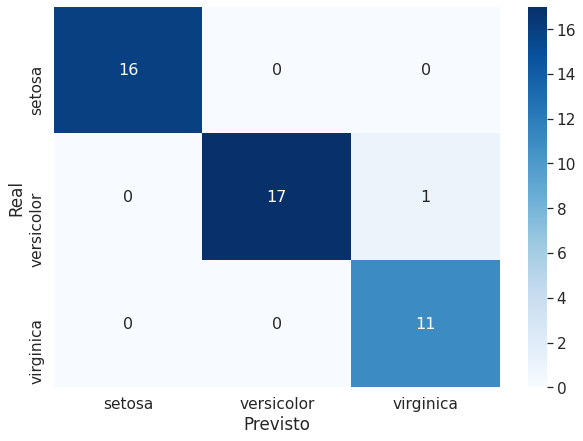

In [ ]:
# Matrix de confusão
data = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), columns= np.unique(y_test), index = np.unique(y_test))
data.index.name = 'Real'
data.columns.name = 'Previsto'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4) #for label size
sns.heatmap(data, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

Observando a matriz de confusão acima, observa-se que somente houve um erro nas predições feitas pelo modelo. Que é o caso do falso positivo observado na linha 37 como dito anteriormente.

In [ ]:
# Report metricas
print(metrics.classification_report(y_test, y_pred, target_names=np.unique(y_test)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        18
   virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Quanto as métricas de precisão e recall, temos uma alta razão de itens relevantes (precision) com relação aos itens selecionados (recall). Assim sendo, tem-se um valor alto de F1 o que nos indica que nosso modelo apresenta relevância estatística. [2]

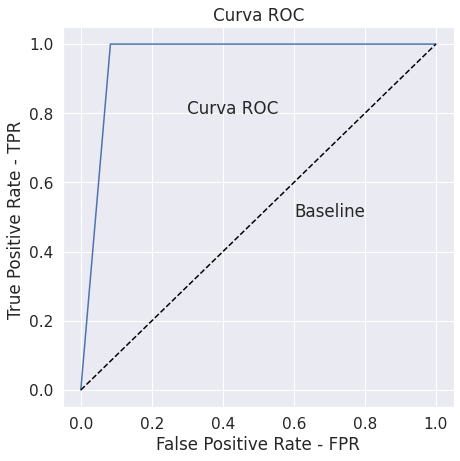

Area sobre a curva: 0.96


In [ ]:
# Curva ROC para Virginica e Versicolor

# Obtenção de dados
y_test_bin = classificacao[classificacao['Estimado'].isin(['virginica', 'versicolor'])].Estimado
y_test_bin = y_test_bin.map(dict(zip(y_test_bin.unique(), [0,1]))) # classes em string para numeros
Y_pred_bin = classificacao[classificacao['Estimado'].isin(['virginica', 'versicolor'])].Teste
Y_pred_bin = Y_pred_bin.map(dict(zip(Y_pred_bin.unique(), [0,1])))
fpr, tpr, thresholds = metrics.roc_curve(y_test_bin, Y_pred_bin)

# Plotagem 
plt.figure(figsize=(7,7))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],color="black",linestyle="--")
plt.xlabel("False Positive Rate - FPR")
plt.ylabel("True Positive Rate - TPR ")
plt.title("Curva ROC")
plt.text(0.6,0.5,"Baseline")
plt.text(0.3,0.8,"Curva ROC")
plt.show()

# Area sobre a curva 
print('Area sobre a curva: %4.2f' % metrics.roc_auc_score(y_test_bin, Y_pred_bin))

Uma vez que a separação da espécie setosa é mais evidente como dito na analise explorátoria,  pode ser feita uma curva ROC e cálculo de sua área para as espécies virginica e versicolor.

Observa-se que a taxa de positivos verdadeiros se manteve alta por quase toda a extensão da taxa de falsos positivos. Assim sendo espera-se um valor alto de área de curva que, como indicado é muito próximo de 1 o que nos indica uma separação quase ideal dentre essas classes.

# Conclusão

O presente trabalho apresentou a analise exploratória, escolha de modelo, otimização e resultados para o Conjunto de dados IRIS.

Fez-se uma análise classficatória, mostrando que o conjunto de dados apresenta distribuições gaussianas, um cluster evidente para a espécie setosa e uma correlação forte entre comprimento e largura de sepala.

Além disso, o conjunto de dados tem classes balanceadas e ,nem apresenta outliers, nem valores nulos em seus registros.

Fez-se uma comparação entre possíveis modelos para classifica-lo com uso de validação cruzada Kfold onde obteve-se indicativo de que os melhores modelos são o de Suport Vector Classifier. Posteriormente, otimizando hiperparâmetros com GridSearch encontrou-se os parâmetros ótimos de kernel polinomial, C=1 e gamma = 'scale'.

Por fim, obteve-se um modelo de alta acurácia (98%) com valores altos de F1 para cada uma das especies (1, 0,97 e 0,96), contastando que modelo apresenta relevância estatística e alta performance.

Fica aqui também o registro para melhoria desse notebook o uso de outros modelos de redução de dimensionalidade (LDA) e modelos do tipo ensemble.

#Referências

[1] MALEKI et. al.,Comparison of Classification Methods Based on the
Type of Attributes and Sample Size, Journal of Convergence Information Technology, 2009, Disponível em [Research Gate](https://www.researchgate.net/publication/220147302_Comparison_of_Classification_Methods_Based_on_the_Type_of_Attributes_and_Sample_Size). Acesso em 03-08-2020.

[2] MARSLAND, Stephen, Machine Learning: An algorithmic perspective, 2nd ed. CRC Press, Boca Raton, 2009.





# Ciclo 2

Improvements:
- versão do scikit na aba de versões

Modelos: pca e ensemple (lda?)

